In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('gurgaon_outlier_treated.csv')

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
0,0,0,0,Flat,sector 22,ambience creacions,3.50,1800.0,19444.0,Carpet area: 1800 (167.23 sq.m.),3,4,3+,8th of 18 Floors,East,undefined,[Safety5 out of 5 Lifestyle4 out of 5 Environm...,8.0,18.0,NaN,1800.0,NaN,0,1,0,0,0,0,0,1,4,6,1,0,0,0,0,0,0,0,0,0,2,4,0,2,57,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1,1,1,1,Flat,sector 85,ss the leaf,1.30,1640.0,7927.0,Super Built up area 1640(152.36 sq.m.),2,2,2,17th of 26 Floors,NaN,New Property,[Green Area4.5 out of 5 Construction4.5 out of...,17.0,26.0,1640.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,NaN,NaN,NaN,4.5,4.0,4.0,4.5,4.5
2,3,3,3,house,sector 3 phase 3 extension,independent,0.55,1100.0,5000.0,Built Up area: 1100 (102.19 sq.m.),2,1,0,1.0,NaN,undefined,[Environment3 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,1100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN
3,4,4,4,Flat,sector 66,emaar mgf the palm drive,3.98,2200.0,18091.0,Super Built up area 2200(204.39 sq.m.),3,4,3+,2nd of 17 Floors,South-East,Moderately Old,[Green Area5 out of 5 Construction4.5 out of 5...,2.0,17.0,2200.0,NaN,NaN,0,1,0,0,0,0,0,0,4,5,1,0,0,0,0,1,0,15,0,1,6,5,0,2,123,NaN,NaN,NaN,5.0,4.5,5.0,5.0,4.5
4,5,5,5,Flat,sector 62,pioneer araya,10.75,5513.0,19499.0,Super Built up area 5514(512.27 sq.m.),5,7,3,10th of 34 Floors,North-East,Relatively New,[Green Area5 out of 5 Construction4 out of 5 M...,10.0,34.0,5514.0,NaN,NaN,0,1,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,15,0,0,0,6,0,2,153,NaN,NaN,NaN,5.0,4.0,4.0,5.0,4.0


In [8]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
index                     0
property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1089
agePossession             0
rating                  338
floor_Num               785
total_floors            785
super_built_up_area    1803
carpet_area            1788
Built_up_area          2551
study room                0
servant room              0
store room                0
pooja room                0
others                    0
TV                        0
Bed                       0
Microwave                 0
Geyser                    0
Fan                       0
Chimney                   0
Water Purifier            0
Dining Table              0
Sofa                

### Built up area

In [10]:
sns.scatterplot(df['Built_up_area'],df['super_built_up_area'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [12]:
sns.scatterplot(df['Built_up_area'],df['carpet_area'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [14]:
((df['super_built_up_area'].isnull()) & (df['Built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3708    False
3709     True
3710    False
3711    False
3712    False
Length: 3713, dtype: bool

In [15]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['Built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [ ]:
all_present_df.shape

(531, 24)

In [16]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['Built_up_area']).median()

In [17]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['Built_up_area']).median()

In [18]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.1045454545454545 0.9


In [19]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['Built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [20]:
sbc_df.head()

,Unnamed: 0.1,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
5,6,6,6,Flat,sector 109,raheja atharva,0.79,996.0,7932.0,Super Built up area 1457(135.36 sq.m.)Carpet a...,3,2,2,3rd of 14 Floors,NaN,Relatively New,[Green Area4 out of 5 Construction2 out of 5 M...,3.0,14.0,1457.0,996.0,NaN,0,0,0,0,0,0,0,1,3,5,1,1,0,0,0,1,1,6,1,1,6,0,0,2,44,NaN,NaN,NaN,4.0,4.0,4.0,4.0,2.0
8,9,9,9,Flat,sector 70,shree vardhman victoria,1.60,1950.0,8205.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3,5,3,6th of 18 Floors,North,Relatively New,[Green Area5 out of 5 Construction5 out of 5 M...,6.0,18.0,1950.0,1161.0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,0,0,108,NaN,NaN,NaN,3.5,4.5,4.5,5.0,5.0
11,12,12,12,Flat,sector 56,cghs vidya enclave,1.70,1550.0,10968.0,Super Built up area 1600(148.64 sq.m.)Carpet a...,3,2,3,6th of 9 Floors,NaN,Old Property,[Green Area5 out of 5 Construction4.5 out of 5...,6.0,9.0,1600.0,1550.0,NaN,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,101,NaN,NaN,NaN,5.0,5.0,4.0,5.0,4.5
12,13,13,13,Flat,sector 37d,signature global the millennia,0.65,596.0,10906.0,Super Built up area 650(60.39 sq.m.)Carpet are...,2,2,3,Ground of 16 Floors,NaN,New Property,[Environment4 out of 5 Lifestyle4 out of 5 Con...,0.0,16.0,650.0,596.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,40,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
23,24,24,24,Flat,sector 107,m3m woodshire,0.75,1366.0,5490.0,Super Built up area 1366(126.91 sq.m.)Carpet a...,2,2,3+,14th of 14 Floors,West,Relatively New,[Green Area4.5 out of 5 Construction5 out of 5...,14.0,14.0,1366.0,1050.0,NaN,0,0,0,1,0,0,0,0,1,5,0,0,0,0,0,0,0,5,1,1,0,4,0,0,174,NaN,NaN,NaN,4.0,4.5,5.0,4.5,5.0


In [21]:
sbc_df['Built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

C:\Users\rutur\AppData\Local\Temp\ipykernel_7644\4051957235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df['Built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)


In [22]:
df.update(sbc_df)

In [23]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
index                     0
property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1089
agePossession             0
rating                  338
floor_Num               785
total_floors            785
super_built_up_area    1803
carpet_area            1788
Built_up_area          2124
study room                0
servant room              0
store room                0
pooja room                0
others                    0
TV                        0
Bed                       0
Microwave                 0
Geyser                    0
Fan                       0
Chimney                   0
Water Purifier            0
Dining Table              0
Sofa                

In [24]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['Built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [25]:
sb_df.head()

,Unnamed: 0.1,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
1,1,1,1,Flat,sector 85,ss the leaf,1.30,1640.0,7927.0,Super Built up area 1640(152.36 sq.m.),2,2,2,17th of 26 Floors,NaN,New Property,[Green Area4.5 out of 5 Construction4.5 out of...,17.0,26.0,1640.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,NaN,NaN,NaN,4.5,4.0,4.0,4.5,4.5
3,4,4,4,Flat,sector 66,emaar mgf the palm drive,3.98,2200.0,18091.0,Super Built up area 2200(204.39 sq.m.),3,4,3+,2nd of 17 Floors,South-East,Moderately Old,[Green Area5 out of 5 Construction4.5 out of 5...,2.0,17.0,2200.0,NaN,NaN,0,1,0,0,0,0,0,0,4,5,1,0,0,0,0,1,0,15,0,1,6,5,0,2,123,NaN,NaN,NaN,5.0,4.5,5.0,5.0,4.5
4,5,5,5,Flat,sector 62,pioneer araya,10.75,5513.0,19499.0,Super Built up area 5514(512.27 sq.m.),5,7,3,10th of 34 Floors,North-East,Relatively New,[Green Area5 out of 5 Construction4 out of 5 M...,10.0,34.0,5514.0,NaN,NaN,0,1,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,15,0,0,0,6,0,2,153,NaN,NaN,NaN,5.0,4.0,4.0,5.0,4.0
6,7,7,7,Flat,sector 107,m3m woodshire,0.94,1366.0,6881.0,Super Built up area 1366(126.91 sq.m.),2,2,3+,1st of 14 Floors,East,Moderately Old,[Green Area4.5 out of 5 Construction5 out of 5...,1.0,14.0,1366.0,NaN,NaN,0,0,0,0,0,0,0,0,2,5,0,0,0,0,0,0,0,0,0,1,2,3,0,0,113,NaN,NaN,NaN,4.0,4.5,5.0,4.5,5.0
7,8,8,8,Flat,sector 68,pareena mi casa,1.70,2000.0,8500.0,Super Built up area 1999(185.71 sq.m.),4,4,3+,23rd of 36 Floors,NaN,New Property,[Safety5 out of 5 Lifestyle4 out of 5 Environm...,23.0,36.0,1999.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,88,5.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN


In [26]:
sb_df['Built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

C:\Users\rutur\AppData\Local\Temp\ipykernel_7644\3942025680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['Built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)


In [27]:
df.update(sb_df)

In [28]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
index                     0
property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1089
agePossession             0
rating                  338
floor_Num               785
total_floors            785
super_built_up_area    1803
carpet_area            1788
Built_up_area          1224
study room                0
servant room              0
store room                0
pooja room                0
others                    0
TV                        0
Bed                       0
Microwave                 0
Geyser                    0
Fan                       0
Chimney                   0
Water Purifier            0
Dining Table              0
Sofa                

In [29]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['Built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [30]:
c_df.head()

,Unnamed: 0.1,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
0,0,0,0,Flat,sector 22,ambience creacions,3.50,1800.0,19444.0,Carpet area: 1800 (167.23 sq.m.),3,4,3+,8th of 18 Floors,East,undefined,[Safety5 out of 5 Lifestyle4 out of 5 Environm...,8.0,18.0,NaN,1800.0,NaN,0,1,0,0,0,0,0,1,4,6,1,0,0,0,0,0,0,0,0,0,2,4,0,2,57,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
10,11,11,11,Flat,sector 61,smart world orchard,1.60,1150.0,13913.0,Carpet area: 1150 (106.84 sq.m.),2,2,2,4th of 4 Floors,North-East,undefined,NaN,4.0,4.0,NaN,1150.0,NaN,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,15,15,15,Flat,sector 86,pyramid urban homes 2,0.41,495.0,8283.0,Carpet area: 501 (46.54 sq.m.),2,2,1,7th of 13 Floors,West,New Property,[Environment5 out of 5 Lifestyle5 out of 5 Con...,7.0,13.0,NaN,501.0,NaN,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,49,4.5,5.0,5.0,4.5,NaN,NaN,NaN,NaN
15,16,16,16,Flat,sector 79,godrej,2.00,2366.0,8453.0,Carpet area: 2366 (219.81 sq.m.),3,4,3+,2nd of 15 Floors,North-East,Relatively New,[Green Area5 out of 5 Amenities5 out of 5 Mana...,2.0,15.0,NaN,2366.0,NaN,0,1,0,0,0,0,0,0,5,5,1,1,0,0,0,1,1,25,1,1,9,4,0,2,156,NaN,NaN,NaN,4.0,4.5,5.0,5.0,5.0
31,32,32,32,house,sector 2,independent,0.98,1080.0,9074.0,Carpet area: 120 (100.34 sq.m.),9,4,3,1.0,South,undefined,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,120.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN


In [31]:
c_df['Built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

C:\Users\rutur\AppData\Local\Temp\ipykernel_7644\1529244678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['Built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)


In [32]:
df.update(c_df)

In [33]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
index                     0
property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1089
agePossession             0
rating                  338
floor_Num               785
total_floors            785
super_built_up_area    1803
carpet_area            1788
Built_up_area           490
study room                0
servant room              0
store room                0
pooja room                0
others                    0
TV                        0
Bed                       0
Microwave                 0
Geyser                    0
Fan                       0
Chimney                   0
Water Purifier            0
Dining Table              0
Sofa                

In [35]:
sns.scatterplot(df['Built_up_area'],df['price'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [38]:
anamoly_df = df[(df['Built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','Built_up_area']]

In [39]:
anamoly_df.sample(5)

,price,area,Built_up_area
630,5.70,1382.0,1382.0
1996,3.40,2200.0,1991.0
1157,6.80,2160.0,220.0
3586,3.50,1440.0,160.0
87,2.85,2045.0,1640.0


In [40]:
anamoly_df['Built_up_area'] = anamoly_df['area']

In [41]:
df.update(anamoly_df)

In [42]:
sns.scatterplot(df['Built_up_area'],df['price'])

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

In [43]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

KeyError: "['area_room_ratio'] not found in axis"

In [44]:
df.head()

,Unnamed: 0.1,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
0,0,0,0,Flat,sector 22,ambience creacions,3.50,1800.0,19444.0,Carpet area: 1800 (167.23 sq.m.),3,4,3+,8th of 18 Floors,East,undefined,[Safety5 out of 5 Lifestyle4 out of 5 Environm...,8.0,18.0,NaN,1800.0,2000.0,0,1,0,0,0,0,0,1,4,6,1,0,0,0,0,0,0,0,0,0,2,4,0,2,57,5.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1,1,1,1,Flat,sector 85,ss the leaf,1.30,1640.0,7927.0,Super Built up area 1640(152.36 sq.m.),2,2,2,17th of 26 Floors,NaN,New Property,[Green Area4.5 out of 5 Construction4.5 out of...,17.0,26.0,1640.0,NaN,1484.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,NaN,NaN,NaN,4.5,4.0,4.0,4.5,4.5
2,3,3,3,house,sector 3 phase 3 extension,independent,0.55,1100.0,5000.0,Built Up area: 1100 (102.19 sq.m.),2,1,0,1.0,NaN,undefined,[Environment3 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,1100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN
3,4,4,4,Flat,sector 66,emaar mgf the palm drive,3.98,2200.0,18091.0,Super Built up area 2200(204.39 sq.m.),3,4,3+,2nd of 17 Floors,South-East,Moderately Old,[Green Area5 out of 5 Construction4.5 out of 5...,2.0,17.0,2200.0,NaN,2200.0,0,1,0,0,0,0,0,0,4,5,1,0,0,0,0,1,0,15,0,1,6,5,0,2,123,NaN,NaN,NaN,5.0,4.5,5.0,5.0,4.5
4,5,5,5,Flat,sector 62,pioneer araya,10.75,5513.0,19499.0,Super Built up area 5514(512.27 sq.m.),5,7,3,10th of 34 Floors,North-East,Relatively New,[Green Area5 out of 5 Construction4 out of 5 M...,10.0,34.0,5514.0,NaN,4990.0,0,1,0,0,0,0,0,0,0,4,1,0,0,0,0,1,0,15,0,0,0,6,0,2,153,NaN,NaN,NaN,5.0,4.0,4.0,5.0,4.0


In [45]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
index                     0
property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1089
agePossession             0
rating                  338
floor_Num               785
total_floors            785
super_built_up_area    1803
carpet_area            1788
Built_up_area           490
study room                0
servant room              0
store room                0
pooja room                0
others                    0
TV                        0
Bed                       0
Microwave                 0
Geyser                    0
Fan                       0
Chimney                   0
Water Purifier            0
Dining Table              0
Sofa                

### floorNum

In [46]:
df[df['floorNum'].isnull()]

,Unnamed: 0.1,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
167,173,173,173,house,sector 12,jacob pura,0.35,360.0,9722.0,Built Up area: 360 (33.45 sq.m.),2,1,0,NaN,NaN,Old Property,[Environment3 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,360.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,3.0,5.0,NaN,NaN,NaN,NaN
360,369,369,369,house,sector 4,independent,0.65,585.0,11111.0,Plot area 65(54.35 sq.m.),4,2,2,NaN,NaN,Moderately Old,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10,0,1,1,0,0,0,0,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
373,382,382,382,house,sector 66,emaar mgf marbella,9.00,4235.0,21251.0,Plot area 5605(520.72 sq.m.)Built Up area: 520...,4,4,3+,NaN,South-West,Relatively New,[Environment3 out of 5 Safety4 out of 5 Lifest...,NaN,NaN,NaN,4235.0,5200.0,0,1,1,1,0,0,0,1,5,6,1,1,0,0,0,1,1,24,0,1,6,6,0,2,114,4.0,4.0,3.0,4.0,NaN,NaN,NaN,NaN
398,407,407,407,house,sector 43,ansal sushant lok plots,3.30,1242.0,26570.0,Plot area 138(115.39 sq.m.),1,1,0,NaN,NaN,Under Construction,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
693,710,710,710,house,sector 3,independent,1.50,1458.0,10288.0,Plot area 162(135.45 sq.m.)Built Up area: 210 ...,3,3,0,NaN,NaN,Old Property,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,210.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1099,1129,1129,1129,Flat,dwarka expressway,experion heartsong,1.08,1756.0,6150.0,Built Up area: 1758 (163.32 sq.m.),3,3,0,NaN,NaN,Under Construction,NaN,NaN,NaN,NaN,NaN,1758.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1362,1398,1398,1398,house,sector 24,independent,1.45,4860.0,2984.0,Plot area 60(50.17 sq.m.),3,3,1,NaN,NaN,Old Property,[Environment4 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,4.0,5.0,4.0,5.0,NaN,NaN,NaN,NaN
1442,1481,1481,1481,Flat,sector 78,NaN,0.60,1625.0,3692.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,NaN,NaN,Under Construction,[Safety4 out of 5 Lifestyle4 out of 5 Environm...,NaN,NaN,NaN,NaN,1625.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,4.0,5.0,NaN,NaN,NaN,NaN
1585,1626,1626,1626,house,sector 43,ansal sushant lok,10.50,3762.0,27911.0,Plot area 418(349.5 sq.m.),4,4,2,NaN,North-East,Old Property,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,6,0,0,0,0,0,0,59,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
1803,1848,1848,1848,house,sector 2,independent,5.60,3240.0,17284.0,Plot area 360(301.01 sq.m.),8,6,3+,NaN,South-West,Moderately Old,[Environment5 out of 5 Lifestyle5 out of 5 Con...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,4.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN


In [47]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [48]:
df['floorNum'].fillna(2.0,inplace=True)

In [49]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
index                     0
property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
facing                 1089
agePossession             0
rating                  338
floor_Num               785
total_floors            785
super_built_up_area    1803
carpet_area            1788
Built_up_area           490
study room                0
servant room              0
store room                0
pooja room                0
others                    0
TV                        0
Bed                       0
Microwave                 0
Geyser                    0
Fan                       0
Chimney                   0
Water Purifier            0
Dining Table              0
Sofa                

In [50]:
1011/df.shape[0]

0.27228656073256124

### facing

<Axes: ylabel='count'>

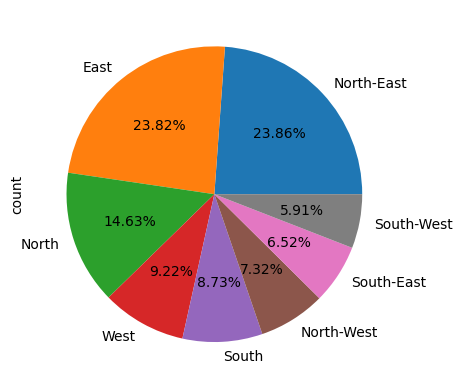

In [51]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [52]:
df.drop(columns=['facing'],inplace=True)

In [53]:
df.sample(5)

,Unnamed: 0.1,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction
2236,2291,2291,2291,house,sector 17,iffco nagar and 17b rwa,2.98,1449.0,20566.0,Plot area 161(134.62 sq.m.),6,6,3+,3.0,Relatively New,[Environment5 out of 5 Safety5 out of 5 Lifest...,NaN,NaN,NaN,NaN,NaN,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
1024,1053,1053,1053,Flat,sector 76,suncity avenue 76,0.55,741.0,7422.0,Carpet area: 741 (68.84 sq.m.),2,2,2,9th of 14 Floors,Under Construction,NaN,9.0,14.0,NaN,741.0,823.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1083,1112,1112,1112,house,sector 7,independent,2.25,1332.0,16892.0,Built Up area: 148 (123.75 sq.m.),5,3,0,2.0,undefined,[Environment4 out of 5 Lifestyle4 out of 5 Con...,NaN,NaN,NaN,NaN,148.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN
149,155,155,155,Flat,sector 95,ramsons kshitij,0.40,685.0,5839.0,Carpet area: 685 (63.64 sq.m.),3,2,2,6th of 6 Floors,undefined,[Green Area4 out of 5 Amenities4 out of 5 Mana...,6.0,6.0,NaN,685.0,761.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,5.0,3.5,4.0,4.0,4.0
1300,1335,1335,1335,Flat,sector 65,emaar mgf emerald floors premier,2.36,1650.0,14303.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,2nd of 4 Floors,Relatively New,[Green Area4.5 out of 5 Construction5 out of 5...,2.0,4.0,1650.0,1400.0,1524.0,1,1,0,0,0,0,0,0,4,7,1,0,0,0,0,1,0,13,1,1,3,4,0,2,136,NaN,NaN,NaN,4.0,4.5,4.5,4.5,5.0


In [54]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
index                     0
property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
agePossession             0
rating                  338
floor_Num               785
total_floors            785
super_built_up_area    1803
carpet_area            1788
Built_up_area           490
study room                0
servant room              0
store room                0
pooja room                0
others                    0
TV                        0
Bed                       0
Microwave                 0
Geyser                    0
Fan                       0
Chimney                   0
Water Purifier            0
Dining Table              0
Sofa                      0
Fridge              

In [55]:
df.drop(index=[2536],inplace=True)

In [56]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
index                     0
property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
agePossession             0
rating                  338
floor_Num               785
total_floors            785
super_built_up_area    1803
carpet_area            1787
Built_up_area           490
study room                0
servant room              0
store room                0
pooja room                0
others                    0
TV                        0
Bed                       0
Microwave                 0
Geyser                    0
Fan                       0
Chimney                   0
Water Purifier            0
Dining Table              0
Sofa                      0
Fridge              

### agePossession

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1638
undefined              575
Moderately Old         561
New Property           502
Old Property           305
Under Construction     131
Name: count, dtype: int64

In [58]:
df[df['agePossession'] == 'Undefined']

,Unnamed: 0.1,Unnamed: 0,index,property_type,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,bathroom,balcony,floorNum,agePossession,rating,floor_Num,total_floors,super_built_up_area,carpet_area,Built_up_area,study room,servant room,store room,pooja room,others,TV,Bed,Microwave,Geyser,Fan,Chimney,Water Purifier,Dining Table,Sofa,Fridge,Modular Kitchen,Stove,Light,Curtains,Exhaust Fan,Wardrobe,AC,Washing Machine,furnishing_type,luxury_score,Safety,Lifestyle,Environment,Connectivity,Management,Amenities,Green_area,Construction


In [59]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [60]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [61]:
df['agePossession'].value_counts()

agePossession
Relatively New        1638
undefined              575
Moderately Old         561
New Property           502
Old Property           305
Under Construction     131
Name: count, dtype: int64

In [62]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [63]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [64]:
df['agePossession'].value_counts()

agePossession
Relatively New        1638
undefined              575
Moderately Old         561
New Property           502
Old Property           305
Under Construction     131
Name: count, dtype: int64

In [65]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [66]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [67]:
df['agePossession'].value_counts()

agePossession
Relatively New        1638
undefined              575
Moderately Old         561
New Property           502
Old Property           305
Under Construction     131
Name: count, dtype: int64

In [68]:
df.isnull().sum()

Unnamed: 0.1              0
Unnamed: 0                0
index                     0
property_type             0
sector                    0
society                   1
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
agePossession             0
rating                  338
floor_Num               785
total_floors            785
super_built_up_area    1803
carpet_area            1787
Built_up_area           490
study room                0
servant room              0
store room                0
pooja room                0
others                    0
TV                        0
Bed                       0
Microwave                 0
Geyser                    0
Fan                       0
Chimney                   0
Water Purifier            0
Dining Table              0
Sofa                      0
Fridge              

In [69]:
df.to_csv('gurgaon_properties_missing_value_imputation.csv',index=False)

In [70]:
df.shape

(3712, 54)